In [7]:
import pandas as pd
df=pd.read_csv(r"C:\DataScience\Projects\Goats_EDA\data.csv")
print(df)


                 Player Season               Competition      Matchday  \
0     Cristiano Ronaldo  02/03             Liga Portugal             6   
1     Cristiano Ronaldo  02/03             Liga Portugal             6   
2     Cristiano Ronaldo  02/03             Liga Portugal             8   
3     Cristiano Ronaldo  02/03  Taca de Portugal Placard  Fourth Round   
4     Cristiano Ronaldo  02/03  Taca de Portugal Placard   Fifth Round   
...                 ...    ...                       ...           ...   
1408  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1409  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1410       Lionel Messi  22/23                   Ligue 1            25   
1411       Lionel Messi  22/23                   Ligue 1            26   
1412  Cristiano Ronaldo  22/23          Saudi Pro League            21   

            Date Venue                 Club                 Opponent Result  \
0     2002-10-07     H          

In [ ]:
df.describe()

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,1413,1413,1413,1413,1413,1413,1413,1413,1413,1355,1413,1413,1397,953
unique,2,22,21,53,821,2,7,173,71,10,108,53,12,159
top,Cristiano Ronaldo,14/15,LaLiga,Group Stage,2013-01-27,H,FC Barcelona,Sevilla FC,3:00,CF,90,1:00,Left-footed shot,Luis Suarez
freq,710,119,785,155,7,823,672,65,92,485,29,209,549,48


In [8]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
    print(df)

                 Player Season               Competition      Matchday  \
0     Cristiano Ronaldo  02/03             Liga Portugal             6   
1     Cristiano Ronaldo  02/03             Liga Portugal             6   
2     Cristiano Ronaldo  02/03             Liga Portugal             8   
3     Cristiano Ronaldo  02/03  Taca de Portugal Placard  Fourth Round   
4     Cristiano Ronaldo  02/03  Taca de Portugal Placard   Fifth Round   
...                 ...    ...                       ...           ...   
1408  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1409  Cristiano Ronaldo  22/23          Saudi Pro League            18   
1410       Lionel Messi  22/23                   Ligue 1            25   
1411       Lionel Messi  22/23                   Ligue 1            26   
1412  Cristiano Ronaldo  22/23          Saudi Pro League            21   

            Date Venue                 Club                 Opponent Result  \
0     2002-10-07     H          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            1413 non-null   object
 1   Season            1413 non-null   object
 2   Competition       1413 non-null   object
 3   Matchday          1413 non-null   object
 4   Date              1413 non-null   object
 5   Venue             1413 non-null   object
 6   Club              1413 non-null   object
 7   Opponent          1413 non-null   object
 8   Result            1413 non-null   object
 9   Playing_position  1355 non-null   object
 10  Minute            1413 non-null   object
 11  At_score          1413 non-null   object
 12  Type              1397 non-null   object
 13  Goal_assist       953 non-null    object
dtypes: object(14)
memory usage: 154.7+ KB


In [ ]:
df.isnull().sum()

Player                0
Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_position     58
Minute                0
At_score              0
Type                 16
Goal_assist         460
dtype: int64

In [ ]:
df.drop(columns=['Goal_assist','Playing_position'],inplace=True)
print(df.to_string())

                 Player  Season                       Competition        Matchday        Date Venue                 Club                           Opponent       Result Minute At_score                    Type
0     Cristiano Ronaldo   02/03                     Liga Portugal               6  2002-10-07     H          Sporting CP                      Moreirense FC         3:00     34     2:00                Solo run
1     Cristiano Ronaldo   02/03                     Liga Portugal               6  2002-10-07     H          Sporting CP                      Moreirense FC         3:00   90+5     3:00                  Header
2     Cristiano Ronaldo   02/03                     Liga Portugal               8  2002-10-26     A          Sporting CP                        Boavista FC         1:02     88     1:02       Right-footed shot
3     Cristiano Ronaldo   02/03          Taca de Portugal Placard    Fourth Round  2002-11-24     H          Sporting CP                       CD Estarreja         

In [ ]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
print(df['Type'].isnull().sum())

0


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\2580918969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(df['Type'].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

Player         0
Season         0
Competition    0
Matchday       0
Date           0
Venue          0
Club           0
Opponent       0
Result         0
Minute         0
At_score       0
Type           0
dtype: int64

In [ ]:
df.Type.value_counts()

Type
Left-footed shot          565
Right-footed shot         338
Penalty                   216
Header                    136
Direct free kick          101
Tap-in                     23
Long distance kick         10
Counter attack goal         7
Solo run                    6
Penalty rebound             6
Deflected shot on goal      4
Chest                       1
Name: count, dtype: int64

In [ ]:
#1.How many goals did Cristiano Ronaldo score in the 02/03 season across all competitions?   

goals_02_03_season = df[(df['Season'] == '02/03') & (df['Type'].notna())]
total_goals_02_03 = goals_02_03_season.shape[0]
print(f"Cristiano Ronaldo scored {total_goals_02_03} goals in the 02/03 season.")

Cristiano Ronaldo scored 5 goals in the 02/03 season.


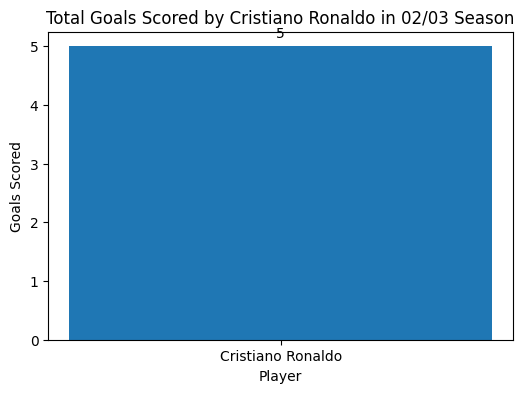

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Set figure size
plt.bar('Cristiano Ronaldo', total_goals_02_03)
plt.title('Total Goals Scored by Cristiano Ronaldo in 02/03 Season')
plt.xlabel('Player')
plt.ylabel('Goals Scored')

# Annotate the bar with the number of goals
plt.text(0, total_goals_02_03 + 0.1, str(total_goals_02_03), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
#CONCLUSION

# Based on the dataset analysis, Cristiano Ronaldo scored 5 goals during the 2002/2003 season across all competitions. This period marks the early stages of his professional career at Sporting CP, where he showcased his goal-scoring ability in a variety of matches.

In [ ]:
#2.How many goals did Lionel messi score in the 04/05 season across all competitions?   

goals_04_05_season = df[(df['Season'] == '04/05') & (df['Type'].notna())]
total_goals_04_05 = goals_04_05_season.shape[0]
print(f"Lionel Messi scored {total_goals_04_05} goals in the 04/05 season.")

Lionel Messi scored 10 goals in the 04/05 season.


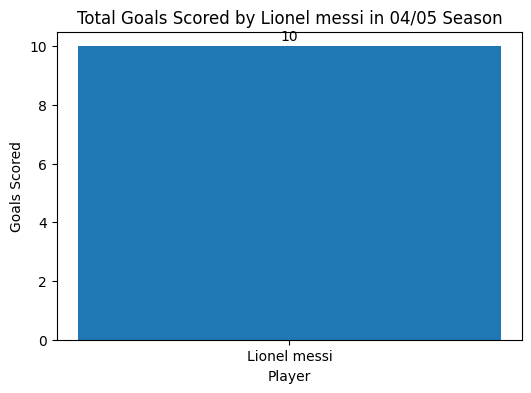

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
plt.bar('Lionel messi', total_goals_04_05)
plt.title('Total Goals Scored by Lionel messi in 04/05 Season')
plt.xlabel('Player')
plt.ylabel('Goals Scored')

plt.text(0, total_goals_04_05 + 0.1, str(total_goals_04_05), ha='center', va='bottom')
plt.show()

In [ ]:
#CONCLUSION

# Based on the dataset analysis, Lionel messi scored 10 goals during the 2004/2005 season across all competitions.This shows that how much talent he had.

In [ ]:
#3.How many of Ronaldo's goals were headers, and how many were left-footed vs. right-footed shots?

ronaldo_data = df[df['Player'] == 'Cristiano Ronaldo']
goal_types = ronaldo_data[ronaldo_data['Type'].notna()].groupby('Type').size()

headers = goal_types.get('Header', 0)
left_footed = goal_types.get('Left-footed shot', 0)
right_footed = goal_types.get('Right-footed shot', 0)

print(f"Headers: {headers}")
print(f"Left-footed shots: {left_footed}")
print(f"Right-footed shots: {right_footed}")

Headers: 112
Left-footed shots: 128
Right-footed shots: 253


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\3497884239.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goal_labels,y= goal_counts,palette='Blues_d')


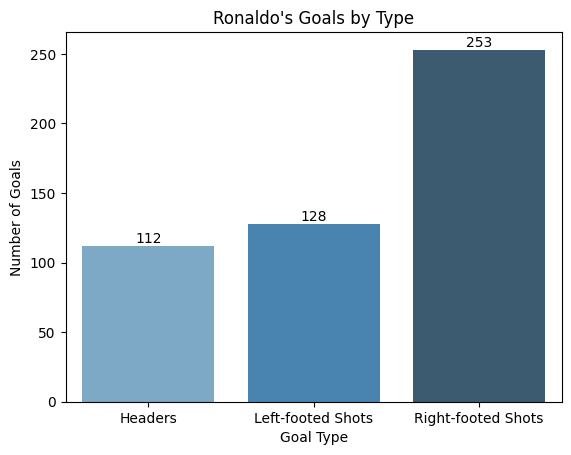

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

goal_types = ronaldo_data[ronaldo_data['Type'].notna()].groupby('Type').size()
headers = goal_types.get('Header', 0)
left_footed = goal_types.get('Left-footed shot', 0)
right_footed = goal_types.get('Right-footed shot', 0)
goal_labels = ['Headers', 'Left-footed Shots', 'Right-footed Shots']
goal_counts = [headers, left_footed, right_footed]

sns.barplot(x=goal_labels,y= goal_counts,palette='Blues_d')
plt.title("Ronaldo's Goals by Type")
plt.xlabel('Goal Type')
plt.ylabel('Number of Goals')

for i, count in enumerate(goal_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()


In [ ]:
#Conclusion:

#Based on the dataset filtered for Cristiano Ronaldo, we analyzed the types of goals he scored across all seasons. The results revealed that Ronaldo's goals are categorized into headers, left-footed shots, and right-footed shots. This analysis helps us understand his versatility in front of goal, showing his ability to score in a variety of ways.

In [ ]:
# 4.Did Messi perform better in home matches or away matches? 

import pandas as pd

messi_data = df[df['Player'] == 'Lionel Messi']
goal_data = messi_data[messi_data['Type'].notna()]

home_goals = goal_data[goal_data['Venue'] == 'H'].shape[0]
away_goals = goal_data[goal_data['Venue'] == 'A'].shape[0]

print(f"Home Goals: {home_goals}")
print(f"Away Goals: {away_goals}")


Home Goals: 419
Away Goals: 284


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\3686550623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=goals,palette='Blues_d')


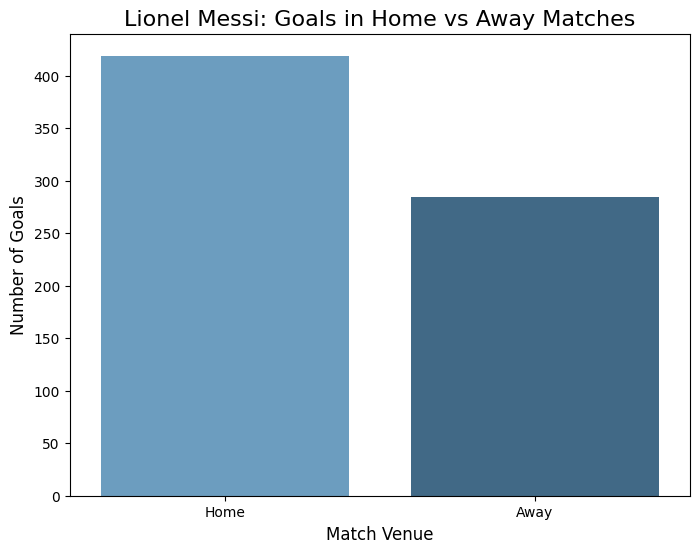

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Home', 'Away']
goals = [home_goals, away_goals]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=goals,palette='Blues_d')

plt.title('Lionel Messi: Goals in Home vs Away Matches', fontsize=16)
plt.ylabel('Number of Goals', fontsize=12)
plt.xlabel('Match Venue', fontsize=12)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,it clearly shows that messi performs better in home matches.

In [ ]:
#5.In which minute did Ronaldo score most of his goals?

ronaldo_goals = df[(df['Player'] == 'Cristiano Ronaldo') & (df['Type'].notnull())]

minute_goals_ronaldo = ronaldo_goals['Minute'].value_counts()
most_frequent_minute_ronaldo = minute_goals_ronaldo.idxmax()
goal_count_ronaldo = minute_goals_ronaldo.max()

print(f"Ronaldo scored the most goals in the {most_frequent_minute_ronaldo}th minute with {goal_count_ronaldo} goals.")

Ronaldo scored the most goals in the 90th minute with 17 goals.


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\1038222197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minute_goals_ronaldo.index, y=minute_goals_ronaldo.values,palette='viridis')


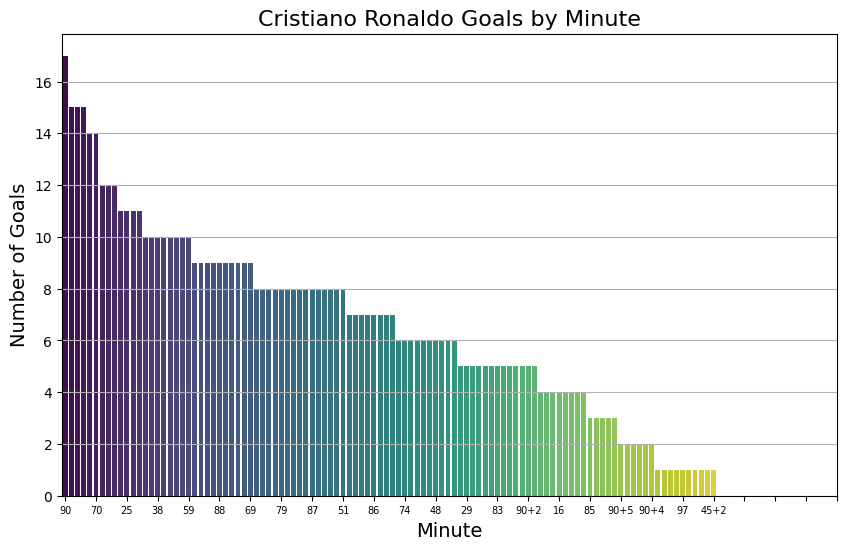

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=minute_goals_ronaldo.index, y=minute_goals_ronaldo.values,palette='viridis')
plt.title('Cristiano Ronaldo Goals by Minute', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.xticks(range(0, 130, 5),fontsize=7)
plt.grid(axis='y')

plt.show()

In [ ]:
#CONCLUSION

#Based on the dataset,Ronaldo scored the most goals in the 90th minute with 17 goals.

In [ ]:
#6.In which minute did Messi score most of his goals?

messi_goals = df[(df['Player'] == 'Lionel Messi') & (df['Type'].notnull())]

minute_goals_messi = messi_goals['Minute'].value_counts()
most_frequent_minute_messi = minute_goals_messi.idxmax()
goal_count_messi = minute_goals_messi.max()

print(f"Messi scored the most goals in the {most_frequent_minute_messi}th minute with {goal_count_messi} goals.")

Messi scored the most goals in the 55th minute with 14 goals.


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\1425268877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=minute_goals_messi.index, y=minute_goals_messi.values,palette='Blues_d')


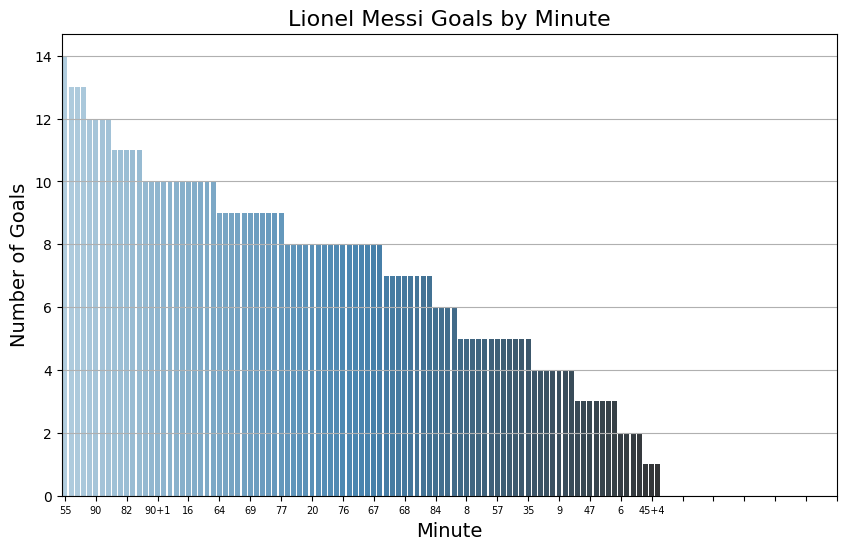

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=minute_goals_messi.index, y=minute_goals_messi.values,palette='Blues_d')
plt.title('Lionel Messi Goals by Minute', fontsize=16)
plt.xlabel('Minute', fontsize=14)
plt.ylabel('Number of Goals', fontsize=14)
plt.xticks(range(0, 130, 5),fontsize=7)
plt.grid(axis='y')

plt.show()

In [ ]:
#CONCLUSION

#Based on the dataset,Messi scored the most goals in the 55th minute with 14 goals.

In [ ]:
#7.Did Ronaldo perform better in home matches or away matches? 

import pandas as pd

ronaldo_data = df[df['Player'] == 'Cristiano Ronaldo']
goal_data = ronaldo_data[ronaldo_data['Type'].notna()]

home_goals = goal_data[goal_data['Venue'] == 'H'].shape[0]
away_goals = goal_data[goal_data['Venue'] == 'A'].shape[0]

print(f"Home Goals: {home_goals}")
print(f"Away Goals: {away_goals}")

Home Goals: 404
Away Goals: 306


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\949261835.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=goals,palette='Blues_d')


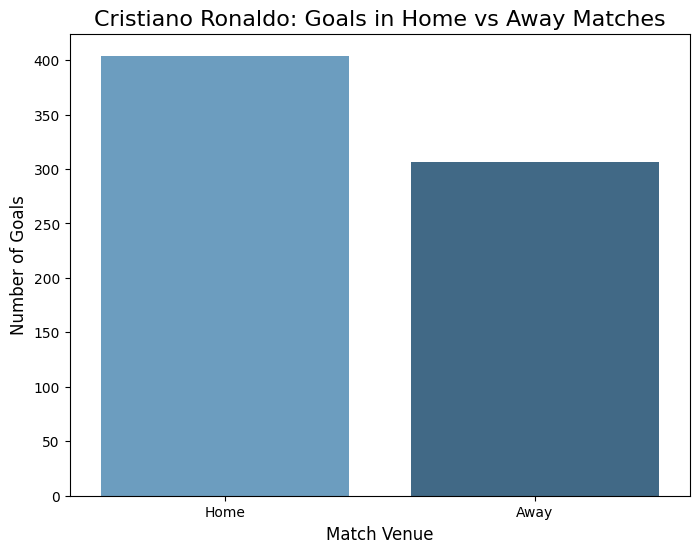

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Home', 'Away']
goals = [home_goals, away_goals]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=goals,palette='Blues_d')

plt.title('Cristiano Ronaldo: Goals in Home vs Away Matches', fontsize=16)
plt.ylabel('Number of Goals', fontsize=12)
plt.xlabel('Match Venue', fontsize=12)
plt.show()

In [ ]:
#CONCLUSION

#Based on the dataset,it clearly shows that ronaldo performs better in home matches.

In [ ]:
#8 How many goals did Ronaldo score each season?

ronaldo_data = df[df['Player'] == 'Cristiano Ronaldo']
goal_data = df[df['Type'].notna()]
goals_per_season = goal_data.groupby('Season').size()
print(goals_per_season)

Season
02/03       5
03/04       6
04/05      10
05/06      20
06/07      40
07/08      58
08/09      64
09/10      80
10/11     106
11-Dec     73
11/12      60
13/14      92
14/15     119
15/16      92
16/17      96
17/18      89
18/19      79
19/20      68
20/21      74
21/22      38
22/23      29
Dec-13    115
dtype: int64


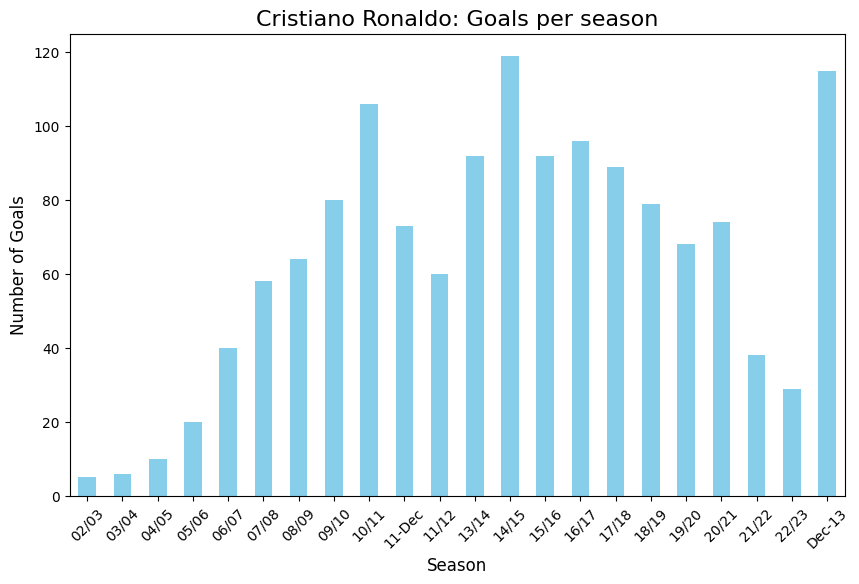

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

goal_data = df[df['Type'].notna()]
goals_per_season = goal_data.groupby('Season').size()

plt.figure(figsize=(10, 6))
goals_per_season.plot(kind='bar', color='skyblue')

plt.title('Cristiano Ronaldo: Goals per season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Cristiano ronaldo scored every season he played.And he scored most goals in 14/15 season.

In [ ]:
#9 How many goals did Messi score each season?

messi_data = df[df['Player'] == 'Lionel Messi']
goal_data_messi = df[df['Type'].notna()]
messi_goals_per_season = messi_data.groupby('Season').size()
print(messi_goals_per_season)

Season
04/05      1
05/06      8
06/07     17
07/08     16
08/09     38
09/10     47
10/11     53
11-Dec    73
13/14     41
14/15     58
15/16     41
16/17     54
17/18     45
18/19     51
19/20     31
20/21     38
21/22     14
22/23     17
Dec-13    60
dtype: int64


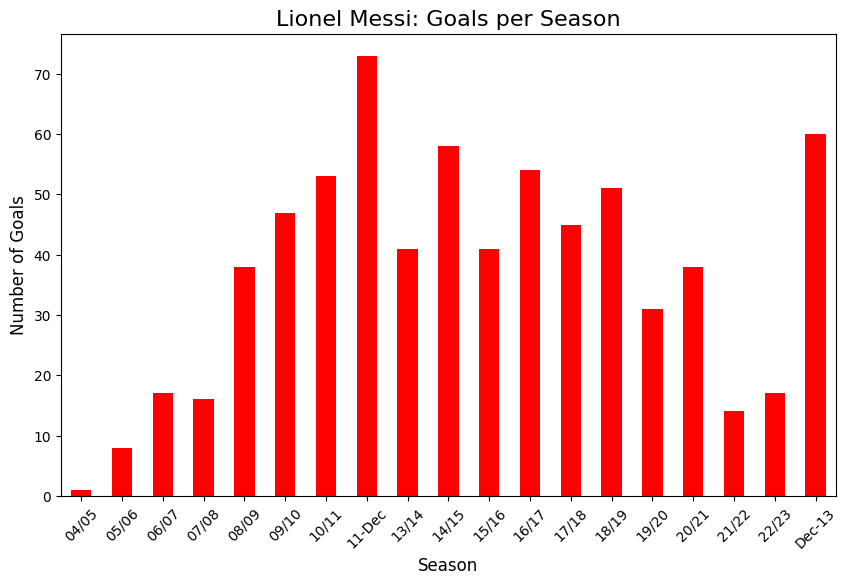

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

goal_data = df[df['Type'].notna()]

messi_data = goal_data[goal_data['Player'] == 'Lionel Messi']
messi_goals_per_season = messi_data.groupby('Season').size()
plt.figure(figsize=(10, 6))
messi_goals_per_season.plot(kind='bar', color='red')

plt.title('Lionel Messi: Goals per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Lionel Messi scored every season he played.And he scored most goals in 11/12 season.

In [ ]:
#9 Which opponent teams did Ronaldo score the most goals against?

import pandas as pd

goal_data = df[df['Type'].notna()]
ronaldo_data = goal_data[goal_data['Player'] == 'Cristiano Ronaldo']

goals_against_opponents = ronaldo_data['Opponent'].value_counts()
top_opponents = goals_against_opponents.head(15)
print(top_opponents)


Opponent
Sevilla FC                 27
Atletico de Madrid         25
Getafe CF                  23
Celta de Vigo              20
FC Barcelona               20
Athletic Bilbao            17
Malaga CF                  17
Real Sociedad              15
Valencia CF                15
RCD Espanyol Barcelona     15
Villarreal CF              15
Levante UD                 14
Tottenham Hotspur          14
Deportivo de La CoruÃ±a    13
Rayo Vallecano             12
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\1796980005.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Opponent', y='Number of Goals', data=top_opponents, palette='Blues_d')


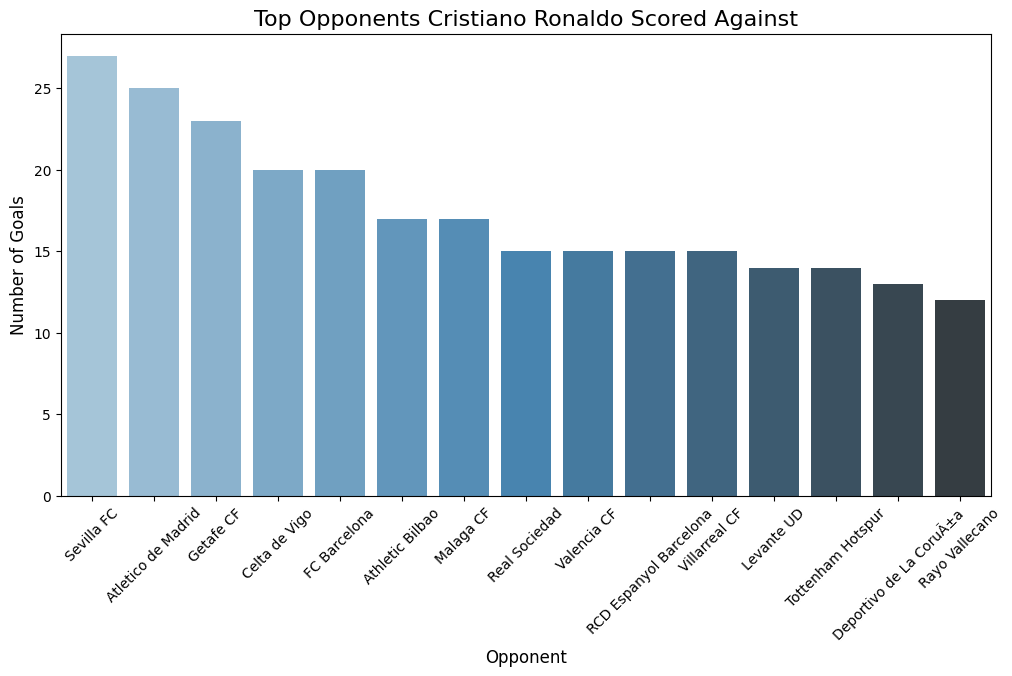

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

goal_data = df[df['Type'].notna()]
ronaldo_data = goal_data[goal_data['Player'] == 'Cristiano Ronaldo']

goals_against_opponents = ronaldo_data['Opponent'].value_counts()
top_opponents = goals_against_opponents.head(15).reset_index()
top_opponents.columns = ['Opponent', 'Number of Goals']


plt.figure(figsize=(12, 6))
sns.barplot(x='Opponent', y='Number of Goals', data=top_opponents, palette='Blues_d')
plt.title('Top Opponents Cristiano Ronaldo Scored Against', fontsize=16)
plt.xlabel('Opponent', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Cristiano Ronaldo scored most goal against Sevilla FC[27]

In [ ]:
#10 Which opponent teams did Messi score the most goals against?

goal_data=df[df['Type'].notna()]
messi_data=messi_data[messi_data['Player']=='Lionel Messi']

goals_against_opponents = messi_data['Opponent'].value_counts()
top_opponents = goals_against_opponents.head(15)
print(top_opponents)



Opponent
Sevilla FC                38
Atletico de Madrid        32
Valencia CF               31
Athletic Bilbao           29
Real Madrid               26
Real Betis Balompie       26
RCD Espanyol Barcelona    25
CA Osasuna                25
Levante UD                24
Getafe CF                 21
Deportivo de La Coruaa    20
SD Eibar                  20
Real Sociedad             18
Rayo Vallecano            18
Villarreal CF             16
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\2022613288.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Opponent', y='Number of Goals', data=top_opponents, palette='magma')


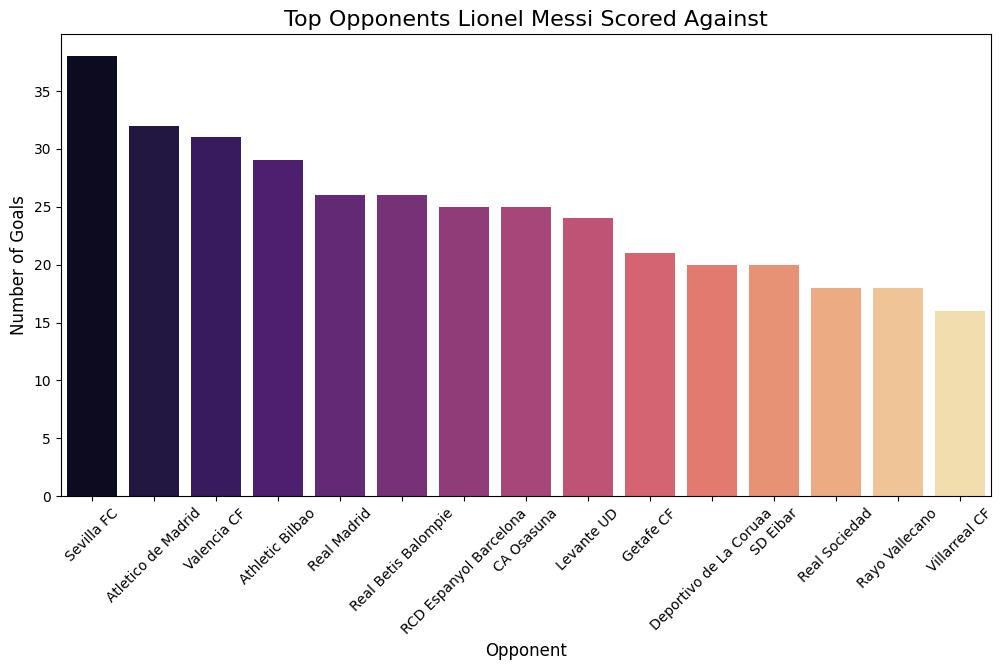

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

goal_data = df[df['Type'].notna()]
messi_data = goal_data[goal_data['Player'] == 'Lionel Messi']

goals_against_opponents = messi_data['Opponent'].value_counts()
top_opponents = goals_against_opponents.head(15).reset_index()
top_opponents.columns = ['Opponent', 'Number of Goals']


plt.figure(figsize=(12, 6))
sns.barplot(x='Opponent', y='Number of Goals', data=top_opponents, palette='magma')
plt.title('Top Opponents Lionel Messi Scored Against', fontsize=16)
plt.xlabel('Opponent', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Lionel Messi scored most goal against Sevilla FC[38]

In [ ]:
#11 Which competition saw Messi scoring the most goals? 

import pandas as pd

goal_data = df[df['Type'].notna()]
messi_data = goal_data[goal_data['Player'] == 'Lionel Messi']

goals_per_competition = messi_data['Competition'].value_counts()
top_competition = goals_per_competition.head(10)
print(top_competition)


Competition
LaLiga                   474
UEFA Champions League    128
Copa del Rey              56
Ligue 1                   20
Supercopa                 14
FIFA Club World Cup        5
UEFA Super Cup             3
Troph�e des Champions      1
Trophée des Champions      1
Champions League           1
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\1127603812.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Competition', y='Number of Goals', data=goals_per_competition, palette='viridis')


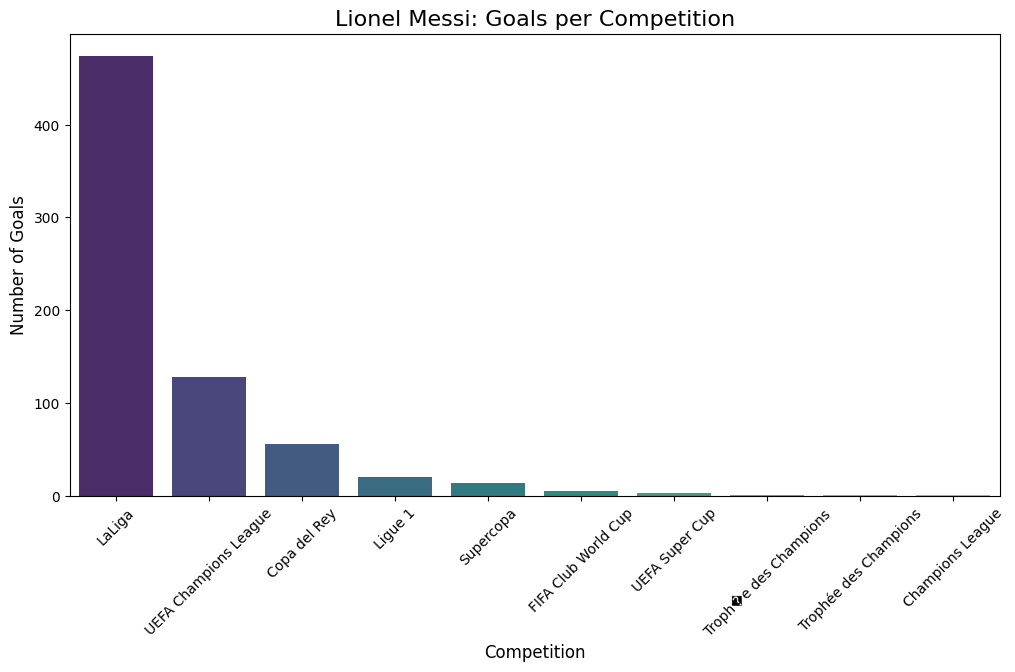

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

goal_data = df[df['Type'].notna()]
messi_data = goal_data[goal_data['Player'] == 'Lionel Messi']

goals_per_competition = messi_data['Competition'].value_counts().reset_index()
goals_per_competition.columns = ['Competition', 'Number of Goals']

plt.figure(figsize=(12, 6))
sns.barplot(x='Competition', y='Number of Goals', data=goals_per_competition, palette='viridis')
plt.title('Lionel Messi: Goals per Competition', fontsize=16)
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Laliga is the competition that we saw messi scoring most goals.

In [ ]:
#12 Which competition saw Ronaldo scoring the most goals? 

import pandas as pd

goal_data = df[df['Type'].notna()]
ronaldo_data = goal_data[goal_data['Player'] == 'Cristiano Ronaldo']

goals_per_competition = ronaldo_data['Competition'].value_counts()
top_competition = goals_per_competition.head(17)
print(top_competition)

Competition
LaLiga                              311
UEFA Champions League               140
Premier League                      103
Serie A                              81
Copa del Rey                         22
FA Cup                               13
Saudi Pro League                      9
FIFA Club World Cup                   7
Italy Cup                             4
EFL Cup                               4
Supercopa                             4
Liga Portugal                         3
Taca de Portugal Placard              2
Supercoppa Italiana                   2
UEFA Super Cup                        2
Europa League                         2
UEFA Champions League Qualifying      1
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_1800\3501868674.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Competition', y='Number of Goals', data=goals_per_competition, palette='Blues_d')


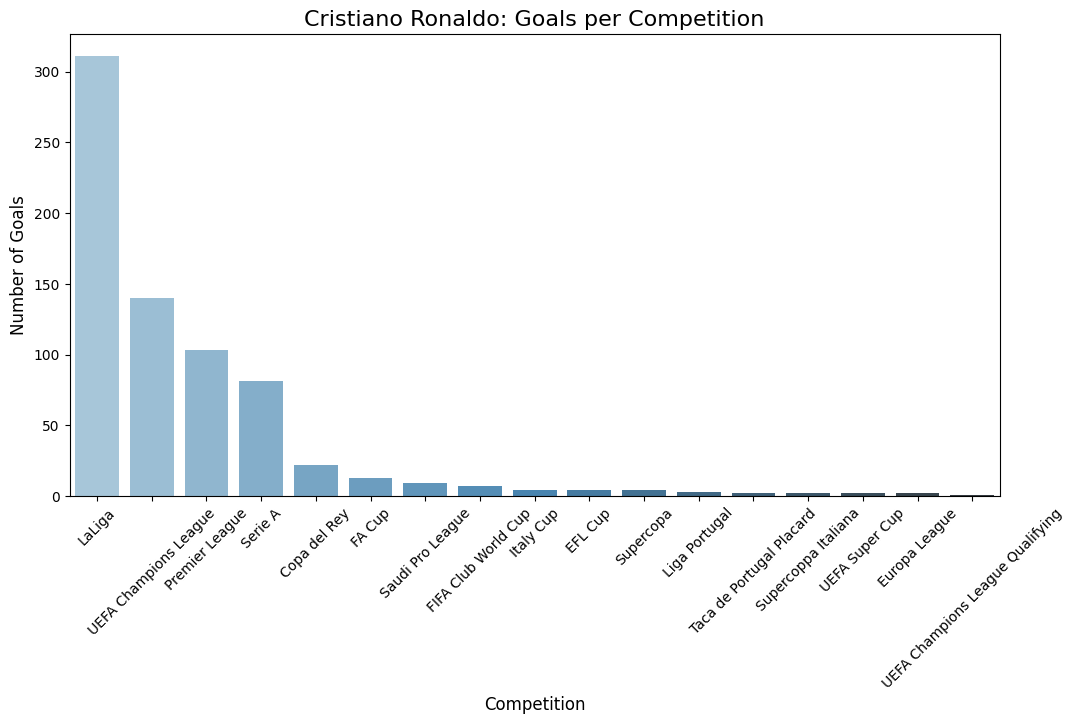

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

goal_data = df[df['Type'].notna()]
ronaldo_data = goal_data[goal_data['Player'] == 'Cristiano Ronaldo']

goals_per_competition = ronaldo_data['Competition'].value_counts().reset_index()
goals_per_competition.columns = ['Competition', 'Number of Goals']

plt.figure(figsize=(12, 6))
sns.barplot(x='Competition', y='Number of Goals', data=goals_per_competition, palette='Blues_d')
plt.title('Cristiano Ronaldo: Goals per Competition', fontsize=16)
plt.xlabel('Competition', fontsize=12)
plt.ylabel('Number of Goals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [ ]:
#CONCLUSION

#Based on the dataset,Laliga is the competition that we saw Ronaldo scoring most goals.

In [ ]:
#TOTAL CONCLUSION

#This dataset provides an in-depth look at football players' match performances across different seasons and competitions, featuring 1,413 records that cover key game details. Each entry includes the Player's name, the Season in which the match was played, and the Competition involved, such as "Liga Portugal" or "Taca de Portugal Placard." Additional information like Matchday and Date situates each game chronologically, while Venue indicates whether the match was played at home or away. For each match, the dataset lists the Club represented by the player, the Opponent team, and the Result, summarizing the final score of each game.